# Quantum query algorithms <a id="quantum-query-algorithms"></a>

## Table of Contents

- [Introduction](#introduction)
- [The query model of computation](#the-query-model-of-computation)
    - [High-level description](#high-level-description)
    - [Examples of query problems](#examples-of-query-problems)
    - [Query gates](#query-gates)
- [Deutsch's algorithm](#deutschs-algorithm)
  - [Quantum circuit description](#quantum-circuit-description)
  - [Analysis](#analysis)
  - [Further remarks on the phase kickback](#further-remarks-on-the-phase-kickback)
  - [Implementation in Qiskit](#implementation-in-qiskit)
- [The Deutsch-Jozsa algorithm](#the-deutsch-jozsa-algorithm)
  - [The Deutsch-Jozsa problem](#the-deutsch-jozsa-problem)
  - [The Bernstein-Vazirani problem](#the-bernstein-vazirani-problem)
- [Simon's algorithm](#simons-algorithm)
  - [Simon's problem](#simons-problem)
  - [Quantum circuit description](#quantum-circuit-description-2)
  - [Analysis](#analysis-2)
  - [Implementation](#implementation)

## [Introduction](#introduction)

This course investigates computational advantages offered by quantum information — or what we can do better with quantum computers than we can with ordinary classical computers. Our focus will be on what we can do with a single quantum computer, as opposed to a distributed setting where multiple quantum computers interact over a network, for instance. (There are quantum advantages to be found in distributed settings, where communication and cryptography come into play, but they're outside of the scope of this course.)

Let's begin with a natural question: What advantages might a quantum computer potentially offer?

The most important advantage is that a quantum computer might provide faster solutions to some computational problems. Time is a precious resource. And it is this potential — that quantum computers may allow us to solve certain computational problems that classical computers are too slow to solve — that has driven quantum computing research for the past few decades. This will be our primary focus.

Other computational resources besides time can also be considered, such as the amount computer memory required to perform computations, which is typically referred to as the space required for computations. But, as it turns out, quantum computers have a limited potential to offer advantages in space usage over classical computers — and classical memory happens to be quite a bit less expensive than quantum memory — so we won't consider it further in this course.

One thing that quantum computers cannot do is to provide solutions to computational problems that classical computers cannot solve irrespective of the resources required. For example, the famous halting problem formulated by Alan Turing in the 1930s cannot be solved (or decided using more precise terminology) by a classical computer, and so it follows that it can't be solved by a quantum computer either. This is because quantum computers can be simulated by classical computers, so any computational problem that can be solved by a quantum computer can also be solved by a classical computer (though the classical computer might take much, much longer).

While the time required to solve problems will be our main concern in this course, we'll deviate slightly from this focus for the purposes of this first lesson. What we'll do is to formulate a simple algorithmic framework — known as the query model — and explore the advantages that quantum computers offer within this framework. The query model of computation is like a petri dish for quantum algorithmic ideas. It's rigid and unnatural, in the sense that it doesn't accurately represent the sorts of computational problems we generally care about in practice, but it has nevertheless proved to be incredibly useful as a tool for developing quantum algorithmic techniques, including ones that power the most well-known quantum algorithms (such as Shor's factoring algorithm). It also happens to be a very useful framework for explaining quantum algorithmic techniques.

After introducing the query model itself, we'll discuss the very first quantum algorithm discovered, which is Deutsch's algorithm, along with an extension of Deutsch's algorithm known as the Deutsch-Jozsa algorithm. These algorithms demonstrate quantifiable advantages of quantum over classical computers within the context of the query mode. We'll then discuss a quantum algorithm known as Simon's algorithm, which offers a more robust and satisfying advantage of quantum over classical computations, for reasons that will be explained when we get to it.

## [The query model of computation](#the-query-model-of-computation)
### [High-level description](#high-level-description)

When we model computations in mathematical terms, we typically have in mind the sort of process represented by the following figure, where information is provided as input, a computation takes place, and output is produced.



While it is true that the computers we use today continuously receive input and produce output, essentially interacting with both us and with other computers in a way not reflected by the figure, the intention is not to represent the ongoing operation of computers. Rather, it is to create a simple abstraction of computation, focusing on isolated computational tasks. For example, the input might encode a number, a vector, a matrix, a graph, a description of a molecule, or something more complicated, while the output encodes a solution to the computational task we have in mind. The key point is that the input is provided to the computation, usually in the form of a binary string, with no part of it being hidden.

In the query model of computation, on the other hand, the entire input is not provided to the computation in this way. Rather, the input is made available in the form of a function, which the computation accesses by making queries. Alternatively, we may view that computations in the query model have random access to bits (or segments of bits) of the input.



We often refer to the input as being provided by an oracle or black box in the context of the query model. Both terms suggest that a complete description of the input is hidden from the computation, with the only way to access it being to ask questions. It is as if we're consulting the Oracle at Delphi about the input: she won't tell us everything she knows, she only answers specific questions. The term black box makes sense especially when we think about the input as being represented by a function: we cannot look inside the function and understand how it works, we can only evaluate it on arguments we select.

We're going to be working exclusively with binary strings in this lesson, as opposed to strings containing different symbols, so let's write $\Sigma = \{0, 1\}$ hereafter to refer to the binary alphabet for convenience. We'll be thinking about different computational problems, with some simple examples described shortly, but for all of them the input will be represented by a function taking the form

$$
f : \Sigma^n \rightarrow \Sigma^m
$$

for two positive integers $n$ and $m$. Naturally, we could choose a different name in place of $f$, but we'll stick with $f$ throughout the lesson.

To say that a computation makes a *query* means that some string $x \in \Sigma^n$ is selected, and then the string $f(x) \in \Sigma^m$ is made available. The precise way that this works for quantum algorithms will be discussed shortly — we need to make sure that this is possible to do with a unitary quantum operation allowing queries to be made in superposition — but for now we can think about it intuitively at a high level.

Finally, the way that we'll measure efficiency of query algorithms is simple: we'll count the number of queries they require. This is related to the time required to perform a computation, but it's not exactly the same because we're ignoring the time required for operations other than the queries, and we're also treating the queries as if they each have unit cost. We could take the operations besides the queries into account if we wanted to (and this is sometimes done), but restricting our attention just to the number of queries helps to keep things simple.


### [Examples of query problems](#examples-of-query-problems)
Here are a few simple examples of query problems.

– **OR**. The input function takes the form $f : \Sigma^n \rightarrow \Sigma$ (so $m = 1$ for this problem). The task is to output 1 if there exists a string $x \in \Sigma^n$ for which $f(x) = 1$, and to output 0 if there is no such string. If we think about the function $f$ as representing a sequence of $2^n$ bits to which we have random access, the problem is to compute the OR of these bits.

– **Parity**. The input function again takes the form $f : \Sigma^n \rightarrow \Sigma$. The task is to determine whether the number of strings $x \in \Sigma^n$ for which $f(x) = 1$ is even or odd. To be precise, the required output is 0 if the set $\{x \in \Sigma^n : f(x) = 1\}$ has an even number of elements and 1 if it has an odd number of elements. If we think about the function $f$ as representing a sequence of $2^n$ bits to which we have random access, the problem is to compute the parity (or exclusive-OR) of these bits.

– **Minimum**. The input function takes the form $f : \Sigma^n \rightarrow \Sigma^m$ for any choices of positive integers $n$ and $m$. The required output is the string $y \in \{f(x) : x \in \Sigma^n\}$ that comes first in the lexicographic (i.e., dictionary) ordering of $\Sigma^m$. If we think about the function $f$ as representing a sequence of $2^n$ integers encoded as strings of length $m$ in binary notation to which we have random access, the problem is to compute the minimum of these integers.

Sometimes we also consider query problems where we have a *promise* on the input. What this means is that we're given some sort of guarantee on the input, and we're not responsible for what happens when this guarantee is not met. Another way to describe this type of problem is to say that some input functions (the ones for which the promise is not satisfied) are considered as "don't care" inputs. No requirements at all are placed on algorithms when they're given "don't care" inputs.

Here's one example of a problem with a promise:

– **Unique search**. The input function takes the form $f : \Sigma^n \rightarrow \Sigma$, and we are *promised* that there is exactly one string $z \in \Sigma^n$ for which $f(z) = 1$, with $f(x) = 0$ for all strings $x \ne z$. The task is to find this unique string $z$.

All four of the examples just described are natural, in the sense that they're easy to describe and we can imagine a variety of situations or contexts in which they might arise.

In contrast, some query problems aren't "natural" like this at all. In fact, in the study of the query model, we sometimes come up with very complicated and highly contrived problems where it's difficult to imagine that anyone would ever actually want to solve them in practice. This doesn't mean that the problems aren't interesting, though! Sometimes things that seem contrived or unnatural at first can produce unexpected clues or inspire new ideas. Shor's quantum algorithm for factoring, which was inspired by Simon's algorithm, is a great example. It's also an important part of the study of the query model to look for extremes, which can shed light on the potential and the limitations of quantum computing.



### [Query gates](#query-gates)
When we're describing computations with circuits, queries are made by special gates called query gates. The simplest way to define query gates for classical Boolean circuits is to simply allow them to compute the input function $f$ directly, as the following figure suggests.



When a Boolean circuit is created for a query problem, the input function $f$ is accessed through these gates, and the number of queries that the circuit makes is simply the number of query gates that appear in the circuit. The input wires of the Boolean circuit itself are initialized to fixed values, which should be considered as part of the algorithm (as opposed to being inputs to the problem).

For example, here's a Boolean circuit with classical query gates that solves the parity problem described above for a function of the form $f : \Sigma \rightarrow \Sigma:$



This algorithm makes two queries because there are two query gates. The way it works is that the function $f$ is queried on the two possible inputs, $0$ and $1$ and the results are plugged into a Boolean circuit that computes the XOR. (This particular circuit appeared as an example of a Boolean circuit in the [Quantum circuits lesson](3_quantum_cicuits.ipynb) of the Basics of quantum information course (lessons 1 though 4))

For quantum circuits, this definition of query gates doesn't work, because these gates will be non-unitary for some choices of the function $f$ So, what we do instead is to define unitary query gates that operate as this figure suggests on standard basis states:



Here, our assumption is that $x \in \Sigma^n$ and $y \in \Sigma^m$ are arbitrary strings. Note that the notation $y \oplus f(x)$ refers to the *bitwise exclusive OR* of two strings, which have length $m$ in this case. For example, $001 \oplus 101 = 100$.

Intuitively speaking, what the gate $U_f$ does (for any chosen function $f$) is to echo the top input string $x$ and XOR the function value $f(x)$ onto the bottom input string $y$, which is a unitary operation for every choice for the function $f$. To be more precise, as a matrix $U_f$ is always a *permutation matrix*, meaning a matrix with a single 1 in each row and each column, with all other entries being 0. Applying a permutation matrix to a vector simply shuffles the entries of the vector (hence the term *permutation matrix*), and therefore does not change that vector's Euclidean norm — revealing that permutation matrices are always unitary.

Notice that when we analyze query algorithms by simply counting the number of queries that a query algorithm makes, we're completely ignoring the difficulty of physically constructing the query gates (for both the classical and quantum versions just described). Intuitively speaking, the construction of the query gates is part of the preparation of the input, not part of finding a solution. That might seem unreasonable — but we must keep in mind that we're not trying to describe practical computing or fully account for the resources required. Rather, we're defining a theoretical model that helps to shed light on the potential advantages of quantum computing. We'll have more to say about this point in the lesson following this one when we turn our attention to a more standard model of computation where inputs are given explicitly to circuits as binary strings.


## [Deutsch's algorithm](#deutschs-algorithm)

Deutsch's algorithm solves the parity problem described above for the special case that $n = 1$. In the context of quantum computing this problem is sometimes referred to as *Deutsch's problem*, and we'll follow that nomenclature in this lesson — but really it's just the simplest nontrivial version of the parity problem.

To be precise, the input is represented by a function $f : \Sigma \rightarrow \Sigma$ from one bit to one bit. There are 4 such functions:

| $a$ | $f_1(a)$ | &nbsp;&nbsp;&nbsp;&nbsp;| $a$ | $f_2(a)$ | &nbsp;&nbsp;&nbsp;&nbsp;| $a$ | $f_3(a)$ | &nbsp;&nbsp;&nbsp;&nbsp;| $a$ | $f_4(a)$ |
|----:|---------:|:-----------------------:|----:|---------:|:-----------------------:|----:|---------:|:-----------------------:|----:|---------:|
|  0  |    0     |                         |  0  |    0     |                         |  0  |    1     |                         |  0  |    1     |
|  1  |    0     |                         |  1  |    1     |                         |  1  |    0     |                         |  1  |    1     |

The first and last of these functions are **constant** and the middle two are **balanced**, meaning that the two possible output values for the function occur the same number of times as we range over the inputs. Deutsch's problem is to determine which of these two categories the input function belongs to: constant or balanced.

> **Deutsch's problem**  
> Input: a function $f : \{0, 1\} \rightarrow \{0, 1\}$  
> Output: 0 if $f$ is constant, 1 if $f$ is balanced

If we view the input function $f$ in Deutsch's problem as representing random access to a string, we're thinking about a two-bit string: $f(0)f(1)$.

| function | string |
|----------|--------|
| $f_1$    |   00   |
| $f_2$    |   01   |
| $f_3$    |   10   |
| $f_4$    |   11   |

When viewed in this way, Deutsch's problem is to compute the parity (or, equivalently, the exclusive-OR) of the two bits.

Every classical query algorithm that correctly solves this problem must query both bits: $f(0)$ and $f(1)$. If we learn that $f(1) = 1$, for instance, the answer could still be 0 or 1, depending on whether $f(0) = 1$ or $f(0) = 0$, respectively. Every other case is similar; knowing just one of the two bits doesn't provide any information at all about their parity. So, the Boolean circuit described in the previous section is the best we can do in terms of the number of queries required to solve this problem.


### [Quantum circuit description](#quantum-circuit-description)
Deutsch's algorithm solves Deutsch's problem using a single query, therefore providing a quantifiable advantage of quantum over classical computations. This may be a modest advantage — one query as opposed to two — but we have to start somewhere. Scientific advancements often have seemingly humble origins.

Here is a quantum circuit that describes Deutsch's algorithm:



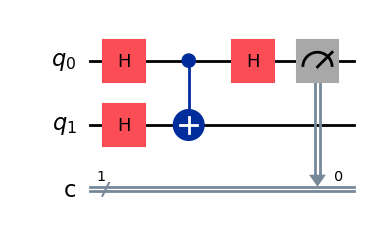

In [2]:
from qiskit import QuantumCircuit
# Create a quantum circuit with 2 qubits and 1 classical bit
qc = QuantumCircuit(2, 1)
# Apply a Hadamard gate to both qubits
qc.h(0)
qc.h(1)

# Apply the oracle (U_f) - this is problem-specific and depends on the function f
# For example, if f(x) = x, the oracle can be represented as a CNOT gate
qc.cx(0, 1)

# Apply a Hadamard gate to the first qubit again
qc.h(0)

# Measure the first qubit
qc.measure(0, 0)

# Draw the circuit
display(qc.draw(output="mpl"))

### [Analysis](#analysis)
To analyze Deutsch's algorithm, we will trace through the action of the circuit above and identify the states of the qubits at the times suggested by this figure:



Here, the initial state is  
$$
|\pi_0\rangle = |1\rangle\,|0\rangle,
$$  
and the two Hadamard operations on the left-hand side of the circuit transform this state to

$$
|\pi_1\rangle = |-\rangle\,|+\rangle
= \frac{1}{2}\bigl(|0\rangle - |1\rangle\bigr)\,|0\rangle
+ \frac{1}{2}\bigl(|0\rangle - |1\rangle\bigr)\,|1\rangle.
$$

As always, we're following Qiskit's ordering convention, which puts the top qubit to the right and the bottom qubit to the left.

Next, the $U_f$ gate is performed. According to the definition of the $U_f$ gate, the value of the function $f$ for the classical state of the top/rightmost qubit is XORed onto the bottom/leftmost qubit, which transforms $|\pi_1\rangle$ into

$$
|\pi_2\rangle
= \tfrac12\bigl(|0 \oplus f(0)\rangle - |1 \oplus f(0)\rangle\bigr)\,|0\rangle
+ \tfrac12\bigl(|0 \oplus f(1)\rangle - |1 \oplus f(1)\rangle\bigr)\,|1\rangle.
$$

We can simplify this expression by observing the formula

$$
|0 \oplus a\rangle - |1 \oplus a\rangle
= (-1)^a \bigl(|0\rangle - |1\rangle\bigr),
$$

which holds for both possible values $a\in\Sigma$. More explicitly the 2 cases:

- For $a=0$:  
  $$
  |0 \oplus 0\rangle - |1 \oplus 0\rangle
  = |0\rangle - |1\rangle = (-1)^0\bigl(|0\rangle - |1\rangle\bigr).
  $$
- For $a=1$:  
  $$
  |0 \oplus 1\rangle - |1 \oplus 1\rangle
  = |1\rangle - |0\rangle = -\bigl(|0\rangle - |1\rangle\bigr)
  = (-1)^1\bigl(|0\rangle - |1\rangle\bigr).
  $$

Thus we can rewrite $|\pi_2\rangle$ as

$$
|\pi_2\rangle
= \tfrac12(-1)^{f(0)}\bigl(|0\rangle - |1\rangle\bigr)\,|0\rangle
+ \tfrac12(-1)^{f(1)}\bigl(|0\rangle - |1\rangle\bigr)\,|1\rangle
= |-\rangle \;\frac{(-1)^{f(0)}|0\rangle + (-1)^{f(1)}|1\rangle}{\sqrt{2}}.
$$

Something interesting just happened!  Although the action of the $U_f$ gate on standard basis states leaves the top/rightmost qubit alone and XORs the function value onto the bottom/leftmost qubit, here we see that the state of the top/rightmost qubit has changed (in general) while the state of the bottom/leftmost qubit remains the same — specifically being in the $|-\rangle$ state before and after the $U_f$ gate is performed.  This phenomenon is known as the **phase kickback**, and we will have more to say about it shortly.

With one final simplification (pulling the global factor $(-1)^{f(0)}$ outside the sum), we obtain:

$$
|\pi_2\rangle
= (-1)^{f(0)}\,|-\rangle
\;\frac{|0\rangle + (-1)^{\,f(0)\oplus f(1)}\,|1\rangle}{\sqrt{2}}
= 
\begin{cases}
(-1)^{f(0)}\,|-\rangle\,|+\rangle 
& \text{if }f(0)\oplus f(1) = 0,\\[6pt]
(-1)^{f(0)}\,|-\rangle\,|-\rangle 
& \text{if }f(0)\oplus f(1) = 1.
\end{cases}
$$

Notice that in this final expression, the exponent is $f(0)\oplus f(1)$ in the exponent of $-1$ as opposed to $f(1)-f(0)$,which is what we may expect from a purely algebraic viewpoint, but we obtain the same value either way. This is becaise the value $k$, $(-1)^k$ depends only on whether $k$ is even or odd—so both viewpoints agree.

Applying the final Hadamard gate to the top qubit leaves us with the state:

$$
|\pi_3\rangle =
\begin{cases}
(-1)^{f(0)}\,|-\rangle|0\rangle & \text{if } f(0)\oplus f(1)=0,\\
(-1)^{f(0)}\,|-\rangle|1\rangle & \text{if } f(0)\oplus f(1)=1,
\end{cases}
$$

which leads to the correct outcome with probability 1 when the right/topmost qubit is measured.



## [Further remarks on the phase kickback](#further-remarks-on-the-phase-kickback)

Before moving on, let's look at the analysis above from a slightly different angle that may shed some light on the phase kickback phenomenon.

First, notice that the following formula works for all choices of bits $b,c \in \Sigma$ :

$$
|b \oplus c\rangle \;=\; X^c \,\lvert b\rangle.
$$

This can be verified by checking it for the two possible values $c=0$ and $c=1$:

$$
\begin{aligned}
|b \oplus 0\rangle &= \lvert b\rangle = I\,\lvert b\rangle = X^0\,\lvert b\rangle,\\
|b \oplus 1\rangle &= \lvert \neg b\rangle = X\,\lvert b\rangle = X^1\,\lvert b\rangle.
\end{aligned}
$$

Using this formula, we see that

$$
U_f\bigl(\lvert b\rangle\lvert a\rangle\bigr)
= \lvert b \oplus f(a)\rangle\,\lvert a\rangle
= \bigl(X^{f(a)}\lvert b\rangle\bigr)\,\lvert a\rangle
$$

for every choice of bits $a,b \in \Sigma$. Because this formula is true for $b=0$ and $b=1$, by linearity we get

$$
U_f\bigl(\lvert \psi\rangle\lvert a\rangle\bigr)
= \bigl(X^{f(a)}\lvert \psi\rangle\bigr)\,\lvert a\rangle
$$

for all qubit state vectors $\lvert \psi\rangle$, and therefore

$$
U_f\bigl(\lvert -\rangle\lvert a\rangle\bigr)
= \bigl(X^{f(a)}\lvert -\rangle\bigr)\,\lvert a\rangle
= (-1)^{f(a)}\,\lvert -\rangle\,\lvert a\rangle.
$$

The key that makes this work is that $X\lvert -\rangle = -\lvert -\rangle$. In mathematical terms, the vector $\lvert -\rangle$ is an *eigenvector* of the matrix $X$ having eigenvalue $-1$. We'll discuss eigenvectors and eigenvalues in greater detail in the upcoming lesson on [Phase estimation and factoring](7_phase_estimation_and_factoring.ipynb), where the phase kickback phenomenon is generalized to other unitary operations.

Keeping in mind that scalars float freely through tensor products, we find an alternative way of reasoning how the operation $U_f$ transforms $\lvert \pi_1\rangle$ into $\lvert \pi_2\rangle$ in the analysis above:

$$
\begin{aligned}
\lvert \pi_2\rangle
&= U_f\bigl(\lvert -\rangle\lvert +\rangle\bigr)\\
&= \tfrac{1}{\sqrt{2}}\;U_f\bigl(\lvert -\rangle\lvert 0\rangle\bigr)
+ \tfrac{1}{\sqrt{2}}\;U_f\bigl(\lvert -\rangle\lvert 1\rangle\bigr)\\
&= \lvert -\rangle\;\frac{(-1)^{f(0)}\lvert 0\rangle + (-1)^{f(1)}\lvert 1\rangle}{\sqrt{2}}.
\end{aligned}
$$

### [Implementation in Qiskit](#implementation-in-qiskit)
Now let's see how we can implement Deutsch's algorithm in Qiskit. We'll start with a version check and then perform the imports required just for this implementation. For the implementations of other algorithms that follows, we'll perform the required imports separately for the sake of greater modularity.

In [16]:
from qiskit import __version__
print(__version__)

2.0.0


In [17]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator

First we'll define a quantum circuit that implements a query gate for one of the four functions $f_1, f_2, f_3 or f_4$ from one bit to one bit described previously. As we already mentioned, the implementation of query gates is not really a part of Deutsch's algorithm itself; here we're essentially just showing one way to prepare the input, in the form of a circuit implementation of a query gate.

In [18]:
def deutsch_function(case: int):
    # This function generates a quantum circuit for one of the 4 functions
    # from one bit to one bit

    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2)
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

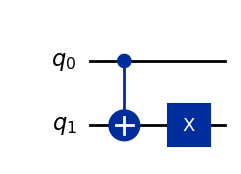

In [ ]:
# We can see what each circuit looks like using the draw method. Here's the circuit for the function f_3:
# Deutsch's algorithm for the function f_3
display(deutsch_function(3).draw(output="mpl"))

Next we will create the actual quantum circuit for Deutsch's algorithm, substituting the query gate with a quantum circuit implementation given as an argument. Shortly we'll plug in one of the four circuits defined by the function `deutsch_function` we defined earlier. Barriers are included to show the visual separation between the query gate implementation and the rest of the circuit.

In [20]:
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in Deutsch's algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

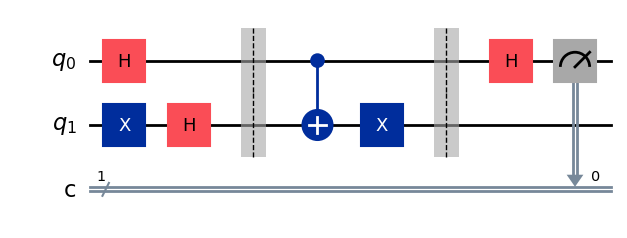

In [21]:
# Now we can compile the circuit for f_3 and draw it:
display(compile_circuit(deutsch_function(3)).draw(output="mpl"))

Finally, we'll create a function that runs the circuit just defined one time and outputs the appropriate result: "constant" or "balanced."

In [23]:
# Finally, we can run the circuit using the AerSimulator backend:
def deutsch_algorithm(function: QuantumCircuit):
    # Determine if a one-bit function is constant or balanced.

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant"
    return "balanced"

In [26]:
for i in range(1, 5):
    print(f"f_{i} is {deutsch_algorithm(deutsch_function(i))}")

f_1 is constant
f_2 is balanced
f_3 is balanced
f_4 is constant


## [The Deutsch-Jozsa algorithm](#the-deutsch-jozsa-algorithm)
Deutsch's algorithm outperforms all classical algorithms for a query problem, but the advantage is quite modest: one query versus two. The Deutsch-Josza algorithm extends this advantage — and, in fact, it can be used to solve a couple of different query problems. Here's a quantum circuit description of the Deutsch-Jozsa algorithm. (An additional classical post-processing step, not shown in the figure, may also be required depending on the specific problem being solved.)



Of course, we haven't actually discussed what problems this algorithm solves; that's done in the subsections that follow.

### [The Deutsch-Jozsa problem](#the-deutsch-jozsa-problem)

We'll begin with the query problem the Deutsch-Josza algorithm was originally intended to solve, which is known as the Deutsch-Jozsa problem. The input function takes the form $f: \Sigma^n \rightarrow \Sigma$ for an arbitary positive integer $n$. Like Deutsch's problem, the task is to output $0$ if $f$ is constant and $1$ if $f$ is balanced, which again means that the number of the input strings on which the function takes the value $0$ is equial to the number of the input strings on which the function takes tha value $1$.

Notice that, when $n$ is larger than $1$, there are functions of the form $f: \Sigma^n \rightarrow \Sigma$ that are neither constant nor balanced. For example, the function $f: \Sigma^2 \rightarrow \Sigma$ defined as:

$$
\begin{aligned}
f(00) = 0\\
f(01) = 0\\
f(10) = 0\\
f(11) = 1
\end{aligned}
$$

falls into neither of these two categories. For the Deutsch-Jozsa problem, we simply don't worry about functions like this — they're considered to be "don't care" inputs. That is, for this problem we have a promise that

> **Deutsch-Jozsa problem**  
> Input: a function $f : \{0, 1\}^n \rightarrow \{0, 1\}$  
> Promise: $f$ is constant or balanced
> Output: 0 if $f$ is constant, 1 if $f$ is balanced

The Deutsch-Jozsa algorithm, with its single query, solves this problem in the following sense: if every one of the $n$ measurement outcomes is $0$ then the function $f$ is constant; and otherwise, if at least one of the measurement outcomes is $1$, then the function $f$ is balanced. Another wat to say this is that the cicuit described above is followed by a classical post-processing step in which the OR of the measirement outcomes is computed to produce the output.

#### Algorithm Analysis

To analyze the performance of the Deutsch-Jozsa algorithm for the Deutsch-Jozsa problem, it's helpful to begin by thinking about the action of a single layer of Hadamard gates. A Hadamard operation can be expressed as a matrix in the usual way,

$$
H = \begin{pmatrix}
\tfrac{1}{\sqrt{2}} & \tfrac{1}{\sqrt{2}} \\[6pt]
\tfrac{1}{\sqrt{2}} & -\tfrac{1}{\sqrt{2}}
\end{pmatrix},
$$

but we can also express this operation in terms of its action on standard basis states:

$$
H\lvert 0\rangle = \tfrac{1}{\sqrt{2}}\lvert 0\rangle + \tfrac{1}{\sqrt{2}}\lvert 1\rangle,\\
H\lvert 1\rangle = \tfrac{1}{\sqrt{2}}\lvert 0\rangle - \tfrac{1}{\sqrt{2}}\lvert 1\rangle.
$$

These two equations can be combined into a single formula,

$$
H\lvert a\rangle = \tfrac{1}{\sqrt{2}}\lvert 0\rangle + \tfrac{1}{\sqrt{2}}(-1)^a\lvert 1\rangle
= \tfrac{1}{\sqrt{2}}\sum_{b\in\{0,1\}}(-1)^{ab}\lvert b\rangle,
$$

which is true for both choices of $a \in \Sigma$.

Now suppose that instead of just a single qubit we have $n qubits, and a Hadamard operation is performed on each. The combined operation on the $n$ qubits is described by the tensor product $H \otimes \cdots \otimes H$ (n times), which we write as $H^{\otimes n}$ for succinctness and clarity. Using the formula from above, followed by expanding and then simplifying, we can express the action of this combined operation on the standard basis states of $n$ qubits like this:
$$
[
\begin{aligned}
H^{\otimes n}\lvert x_{n-1}\cdots x_1 x_0\rangle
&= \bigl(H\lvert x_{n-1}\rangle\bigr)\otimes\cdots\otimes\bigl(H\lvert x_0\rangle\bigr)\\
&= \Bigl(\tfrac{1}{\sqrt{2}}\sum_{y_{n-1}\in\Sigma}(-1)^{x_{n-1}y_{n-1}}\lvert y_{n-1}\rangle\Bigr)\otimes\cdots\otimes\Bigl(\tfrac{1}{\sqrt{2}}\sum_{y_0\in\Sigma}(-1)^{x_0y_0}\lvert y_0\rangle\Bigr)\\
&= \tfrac{1}{2^{n/2}}\sum_{y_{n-1},\dots,y_0\in\Sigma}(-1)^{x_{n-1}y_{n-1} + \cdots + x_0y_0}\lvert y_{n-1}\cdots y_0\rangle.
\end{aligned}
]
$$
Here, by the way, we're writing binary strings of length $n$ as $x_{n-1}\cdots x_0$ and $y_{n-1}\cdots y_0$, following the same numbering convention used in Qiskit.

This formula provides us with a useful tool for analyzing the quantum circuit above. After the first layer of Hadamard gates is performed, the state of the $n+1$ qubits (including the leftmost/bottom qubit, which is treated separately from the rest) is

$$
\bigl(H\lvert 1\rangle\bigr)\,\bigl(H^{\otimes n}\lvert 0\cdots0\rangle\bigr)
= \lvert -\rangle \otimes \tfrac{1}{\sqrt{2^n}}\sum_{x_{n-1},\dots,x_0\in\Sigma}\lvert x_{n-1}\cdots x_0\rangle.
$$

When the $U_f$ operation is performed, this state is transformed into

$[
|-\rangle \,\otimes\, \frac{1}{\sqrt{2^n}}
\sum_{x_{n-1}\cdots x_0\in\Sigma^n}
(-1)^{\,f(x_{n-1}\cdots x_0)}\bigl|x_{n-1}\cdots x_0\bigr\rangle
]$

through exactly the same phase kick-back phenomenon that we saw in the analysis of Deutsch’s algorithm.

Then the second layer of Hadamard gates is performed, which (by the same formula as above) transforms this state into

$$[
|-\rangle \,\otimes\, \frac{1}{2^n}
\sum_{x_{n-1}\cdots x_0\in\Sigma^n}
\sum_{y_{n-1}\cdots y_0\in\Sigma^n}
(-1)^{\,f(x_{n-1}\cdots x_0)\;+\;x_{n-1}y_{n-1}+\cdots+x_{0}y_{0}}
\bigl|y_{n-1}\cdots y_{0}\bigr\rangle.
]$$

This expression looks somewhat complicated, and little can be concluded about the probabilities to obtain different measurement outcomes without more information about the function $f$.

Fortunately, we just need to know the probability that every one of the measurement outcomes is 0 — because that’s the probability that the algorithm determines that $f$ is constant — and this probability has a simple formula:

$$[
\left\lvert
\frac{1}{2^n}
\sum_{x_{n-1}\cdots x_0\in\Sigma^n}
(-1)^{\,f(x_{n-1}\cdots x_0)}
\right\rvert^2
=
\begin{cases}
1 & \text{if } f \text{ is constant},\\[6pt]
0 & \text{if } f \text{ is balanced}.
\end{cases}
]$$

In greater detail, if $f$ is constant, then either $f(x_{n-1}\cdots x_0)=0$ for every string $x_{n-1}\cdots x_0$, in which case the value of the sum is $2^n$, or $f(x_{n-1}\cdots x_0)=1$ for every string $x_{n-1}\cdots x_0$, in which case the value of the sum is $-2^n$. Dividing by $2^n$ and taking the square of the absolute value yields 1.

If, on the other hand, $f$ is balanced, then $f$ takes the value 0 on half of the strings $x_{n-1}\cdots x_0$ and the value 1 on the other half, so the +1 terms and –1 terms in the sum cancel and we're left with the value 0.

So, we conclude that the algorithm operates correctly provided that the promise is fulfilled.

#### Classical Difficulty

The Deutsch-Jozsa algorithm works 100% of the time, always giving us the correct answer when the promise is met, and requires a single query. How does this compare with classical query algorithms for the Deutsch-Jozsa problem?

First, any deterministic classical algorithm that correctly solves the Deutsch-Jozsa problem must make exponentially many queries: $2^{n-1}+1$ queries are required in the worst case. The reasoning is that, if a deterministic algorithm queries $f$ on $2^{n-1}+1$ or fewer diferent strings and obtains the same function value every time, then both answers are still possinle. The function might be constant or ir mught be balanced but though bad luck the queries all happen to reurn the same funtion value. The second possibility might seem unlinkly, but for deterministic algorithms there is no randomness or uncertainty - so they weilll fail systematically on certain functions. We therefore have significant advantage of quantum over classical algorithms in this regard.

There is a catch, however which is tha probabilitic caslical algorithms can salve the Deutsch-Jozsa problem with very high probability using just a few queries. In partcualr, if we simply choose a few different strings of lenth $n$ randomly, and query $f$ on those strings, it is unlinkly that we will get the same funtion value for all of them when $f$ is balanced. To be specific, if we choose $k$ input strings $x^1,...,x^k \in \Sigma^n$ uniformly at randome, evaluae $f(x^1),...,f(x^k)$ and answer $0$ if the funtion calues are all the same and $1$ if not, then we will always be correct when $f$ is constant, and wrong in the case that $f$ is balanced with probability just $2^{-k+1}$. If we take $k=11$, for instance this algorithm will answer correctly with the probability greater than $99.9%$.

So for this reason we so still have a rather modest advantage of qunstum over clasical algorithms - but it is nevertheless a quantifiable advantage representing an imporvement over Deutsch's algorithm

In [29]:
# Implementation
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np

To implement the Deutsch-Jozsa algorithm in Qiskit, we'll start by defining a function `dj_query` that generates a quantum circuit implementing a query gate, for a randomly selected function satisfying the promise for the Deutsch-Jozsa problem. With a 50% chance, the function is constant, and with 50% change the function is balanced. For each of those two possibilities, the function is selected uniformly from the functions of that type. The argument is the number of input bits of the function.

In [33]:
def dj_query(num_qubits):
    # Create a circuit implementing for a query gate for a random function
    # satisfying the promise for the Deutsch-Jozsa problem.

    qc = QuantumCircuit(num_qubits + 1)

    if np.random.randint(0, 2):
        # Flip output qubit with 50% chance
        qc.x(num_qubits)
    if np.random.randint(0, 2):
        # return constant circuit with 50% chance
        return qc

    # Choose half the possible input strings
    on_states = np.random.choice(
        range(2**num_qubits),  # numbers to sample from
        2**num_qubits // 2,  # number of samples
        replace=False,  # makes sure states are only sampled once
    )

    def add_cx(qc, bit_string):
        for qubit, bit in enumerate(reversed(bit_string)):
            if bit == "1":
                qc.x(qubit)
        return qc

    for state in on_states:
        qc.barrier()  # Barriers are added to help visualize how the functions are created.
        qc = add_cx(qc, f"{state:0b}")
        qc.mcx(list(range(num_qubits)), num_qubits)
        qc = add_cx(qc, f"{state:0b}")

    qc.barrier()

    return qc

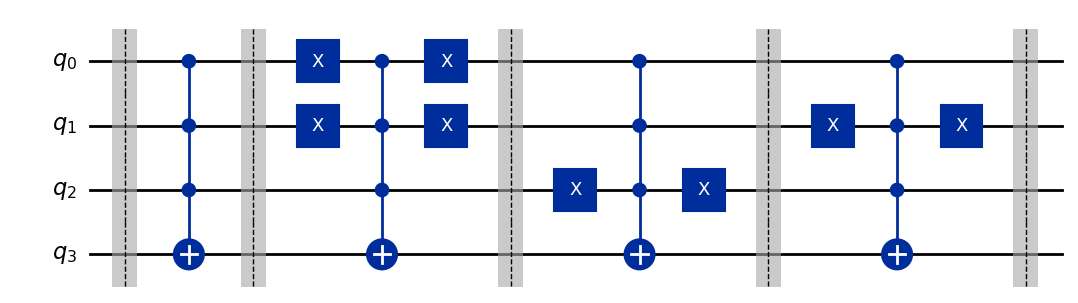

In [34]:
display(dj_query(3).draw(output="mpl"))

In [35]:
# Deutsch-Jozsa algorithm
def compile_circuit(function: QuantumCircuit):
    # Compiles a circuit for use in the Deutsch-Jozsa algorithm.

    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)
    qc.x(n)
    qc.h(range(n + 1))
    qc.compose(function, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

In [36]:
def dj_algorithm(function: QuantumCircuit):
    # Determine if a function is constant or balanced.

    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if "1" in measurements[0]:
        return "balanced"
    return "constant"

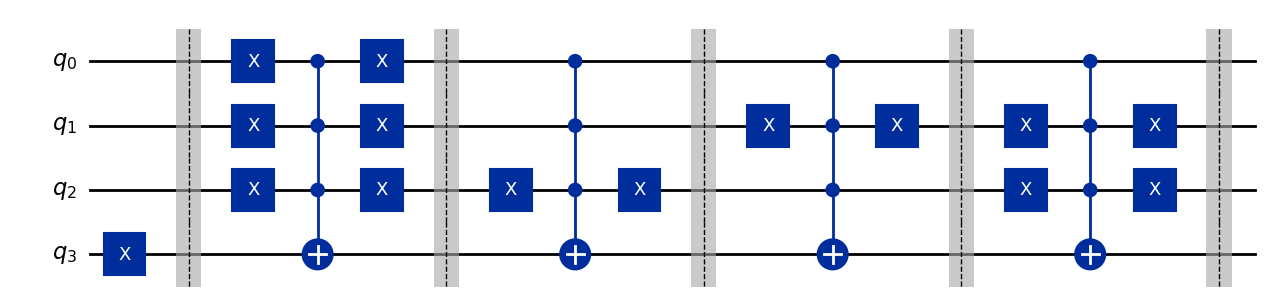

'balanced'

In [37]:
# We can test our implementation by choosing a function randomly, displaying the quantum circuit implementation of a query gate for this function, and then running the Deutsch-Jozsa algorithm on that function.
f = dj_query(3)
display(f.draw("mpl"))
display(dj_algorithm(f))

## [The Bernstein-Vazirani problem](#the-bernstein-vazirani-problem)
Next we'll discuss a problem known as the Bernstein-Vazirani problem. It's also called the Fourier sampling problem, although there are more general formulations of this problem that also go by that name.

First let's introduce some notation. For any two binary strings $x = x_{n-1} ... x_0$ and $y_{n-1} ... y_0$ of length $n$, we define:

$$
x \cdot y = x_{n-1}y_{n-1} \;\oplus\;\cdots\;\oplus\;x_0y_0.
$$

We'll refer to this operation as the *binary dot product*. An alternative way to define it is like so:

$$
x \cdot y =
\begin{cases}
1 & \text{if } x_{n-1}y_{n-1} + \cdots + x_0y_0 \text{ is odd},\\
0 & \text{if } x_{n-1}y_{n-1} + \cdots + x_0y_0 \text{ is even}.
\end{cases}
$$

Notice that this is a symmetric operation, meaning that the result doesn't change if we swap $x$ and $y$, so we're free to do that whenever it's convenient. Sometimes it's useful to think about the binary dot product $x \cdot y$ as being the parity of the bits of $x$ in positions where the string $y$ has a 1, or equivalently, the parity of the bits of $y$ in positions where the string $x$ has a 1.

With this notation in hand we can now define the Bernstein-Vazirani problem.

> **Bernstein-Vazirani problem**  
> Input: a function $f: \{0,1\}^n \to \{0,1\}$

> Promise: there exists a binary string $s = s_{n-1}\cdots s_0$ for which $f(x) = s \cdot x$ for all $x \in \Sigma^n$  
> Output: the string $s$

We don't actually need a new quantum algorithm for this problem; the Deutsch–Jozsa algorithm solves it. In the interest of clarity, let's refer to the quantum circuit from above, which doesn't include the classical post-processing step of computing the OR, as the *Deutsch–Jozsa circuit*.

### Algorithm analysis

To analyze how the Deutsch–Jozsa circuit works for a function satisfying the promise for the Bernstein-Vazirani problem, we'll begin with a quick observation. Using the binary dot product, we can alternatively describe the action of $n$ Hadamard gates on the standard basis states of $n$ qubits as follows:

$$
H^{\otimes n}|x\rangle = \frac{1}{\sqrt{2^n}} \sum_{y\in\Sigma^n} (-1)^{x \cdot y}|y\rangle.
$$

Similar to what we saw when analyzing Deutsch's algorithm, this is because the value $(-1)^k$ for any integer $k$ depends only on whether $k$ is even or odd.

Turning to the Deutsch–Jozsa circuit, after the first layer of Hadamard gates is performed, the state of the $n+1$ qubits is

$$
|-\rangle \otimes \frac{1}{\sqrt{2^n}} \sum_{x\in\Sigma^n} |x\rangle.
$$

The query gate is then performed, which (through the phase kickback phenomenon) transforms the state into

$$
|-\rangle \otimes \frac{1}{\sqrt{2^n}} \sum_{x\in\Sigma^n} (-1)^{f(x)} |x\rangle.
$$

Using our formula for the action of a layer of Hadamard gates, we see that the second layer of Hadamard gates then transforms this state into

$$
|-\rangle \otimes \frac{1}{2^n}
\sum_{x\in\Sigma^n}\;\sum_{y\in\Sigma^n}(-1)^{f(x)+x\cdot y}\,|y\rangle.
$$

Some simplifications can be made to this state, in the exponent of $-1$ inside the sum. We're promised that $f(x) = s\cdot x$ for some string $s = s_{n-1}\cdots s_0$, so we can express the state as

$$
|-\rangle \otimes \frac{1}{2^n}
\sum_{x\in\Sigma^n}\;\sum_{y\in\Sigma^n}(-1)^{s\cdot x + x\cdot y}\,|y\rangle.
$$

Because $s\cdot x$ and $x\cdot y$ are binary values, we can replace the addition with an XOR — again because the only thing that matters for an integer in the exponent of $-1$ is whether it is even or odd. Making use of the symmetry of the binary dot product, we obtain this expression for the state:

$$
|-\rangle \otimes \frac{1}{2^n}
\sum_{x\in\Sigma^n}\;\sum_{y\in\Sigma^n}(-1)^{(s\cdot x)\oplus(x\cdot y)}\,|y\rangle.
$$

(Parentheses have been added for clarity, though they aren't really necessary because it's conventional to treat the binary dot product as having higher precedence than the exclusive-OR.)

At this point we will make use of the following formula.

$$
(s\cdot x)\;\oplus\;(y\cdot x)\;=\;(s\oplus y)\cdot x
$$

We can obtain the formula through a similar formula for bits,

$$
(a c)\;\oplus\;(b c)\;=\;(a\oplus b)\,c,
$$

together with an expansion of the binary dot product and bitwise exclusive-OR:

$$
\begin{aligned}
(s\cdot x)\;\oplus\;(y\cdot x)
&=(s_{n-1}x_{n-1}\oplus\cdots\oplus(s_0x_0))\;\oplus\;(y_{n-1}x_{n-1}\oplus\cdots\oplus(y_0x_0))\\
&=(s_{n-1}\oplus y_{n-1})x_{n-1}\oplus\cdots\oplus(s_0\oplus y_0)x_0\\
&=(s\oplus y)\cdot x.
\end{aligned}
$$

This allows us to express the state of the circuit immediately prior to the measurements like this:

$$
|-\rangle \;\otimes\; \frac{1}{2^n}
\sum_{x\in\Sigma^n}\;\sum_{y\in\Sigma^n}(-1)^{(s\oplus y)\cdot x}\,|y\rangle.
$$

The final step is to make use of yet another formula, which works for every binary string $z = z_{n-1}\cdots z_0$:

$$
\frac{1}{2^n}\sum_{x\in\Sigma^n}(-1)^{\,z\cdot x}
=
\begin{cases}
1 & \text{if } z = 0^n,\\
0 & \text{if } z \neq 0^n,
\end{cases}
$$

Here we're using a simple notation for strings that we'll use several more times in the lesson: $0^n$ is the all-zero string of length $n$.

A simple way to argue that this formula works is to consider the two cases separately. If $z = 0^n$, then $z\cdot x = 0$ for every string $x \in \Sigma^n$, so the value of each term in the sum is 1, and we obtain 1 by summing and dividing by $2^n$. On the other hand, if any one of the bits of $z$ is equal to 1, then the binary dot product $z\cdot x$ is equal to 0 for exactly half of the possible choices for $x\in\Sigma^n$ and 1 for the other half — because the value of the binary dot product $z\cdot x$ flips (from 0 to 1 or from 1 to 0) if we flip any bit of $x$ in a position where $z$ has a 1.

If we now apply this formula to simplify the state of the circuit prior to the measurements, we obtain

$$
|-\rangle \;\otimes\; \frac{1}{2^n}
\sum_{x\in\Sigma^n}\;\sum_{y\in\Sigma^n}(-1)^{(s\oplus y)\cdot x}\,|y\rangle
= |-\rangle \otimes |s\rangle,
$$

owing to the fact that $s \oplus y = 0^n$ if and only if $y = s$. Thus, the measurements reveal precisely the string $s$ we're looking for.



#### Classical difficulty

While the Deutsch–Jozsa circuit solves the Bernstein-Vazirani problem with a single query, any classical query algorithm must make at least $n$ queries to solve this problem. This can be reasoned through a so-called *information-theoretic* argument. Each classical query reveals a single bit of information about the solution, and there are $n$ bits of information that need to be uncovered. It is, in fact, possible to solve the Bernstein-Vazirani problem classically by querying the function on each of the $n$ strings having a single 1, in each possible position, and 0 for all other bits, which reveals the bits of $s$ one at a time. So, the advantage of quantum over classical algorithms for this problem is 1 query versus $n$ queries.



#### Implementation

We've already implemented the Deutsch–Jozsa circuit above, and here we will make use of it to solve the Bernstein-Vazirani problem. First we'll define a function that implements a query gate for the Bernstein-Vazirani problem given any binary string $s$.


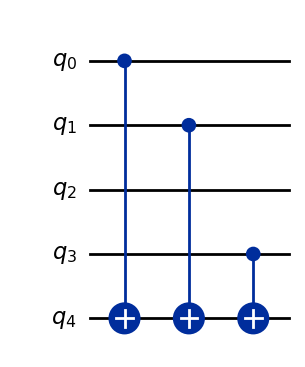

In [39]:
def bv_query(s):
    # Create a quantum circuit implementing a query gate for the
    # Bernstein-Vazirani problem.

    qc = QuantumCircuit(len(s) + 1)
    for index, bit in enumerate(reversed(s)):
        if bit == "1":
            qc.cx(index, len(s))
    return qc

display(bv_query("1011").draw(output="mpl"))

Now we can create a function that runs the Deutsch-Jozsa circuit on the function, using the compile_circuit function that was defined previously.

In [ ]:
# Bernstein-Vazirani algorithm
def bv_algorithm(function: QuantumCircuit):
    qc = compile_circuit(function)
    result = AerSimulator().run(qc, shots=1, memory=True).result()
    return result.get_memory()[0]

display(bv_algorithm(bv_query("1011")))

'1011'

#### Remark on nomenclature
In the context of the Bernstein-Vazirani problem, it is common that the Deutsch-Jozsa algorithm is referred to as the "Bernstein-Vazirani algorithm." This is slightly misleading, because the algorithm is the Deutsch-Jozsa algorithm, as Bernstein and Vazirani clearly stated in their work.

What Bernstein and Vazirani did after showing that the Deutsch-Jozsa algorithm solves the Bernstein-Vazirani problem (as it is stated above) was to define a much more complicated problem, known as the recursive Fourier sampling problem. This is a highly contrived problem where solutions to different instances of the problem effectively unlock new levels of the problem arranged in a tree-like structure. The Bernstein-Vazirani problem is essentially just the base case of this more complicated problem.

The recursive Fourier sampling problem was the first known example of a query problem where quantum algorithms have a so-called super-polynomial advantage over probabilistic algorithms, thereby surpassing the advantage of quantum over classical offered by the Deutsch-Jozsa algorithm. Intuitively speaking, the recursive version of the problem amplifies the 
$1$ versus $n$ advantage of quantum algorithms to something much larger. The most challenging aspect of the mathematical analysis establishing this advantage is showing that classical query algorithms can't solve the problem without making lots of queries. This is quite typical; for many problems it can be very difficult to rule out creative classical approaches that solve them efficiently.

Simon's problem, and the algorithm for it described in the next section, does provide a much simpler example of a super-polynomial (and, in fact, exponential) advantage of quantum over classical algorithms, and for this reason the recursive Fourier sampling problem is less often discussed. It is, nevertheless, an interesting computational problem in its own right.

## [Simon's algorithm](#simons-algorithm)

Simon’s algorithm is a quantum query algorithm for a problem known as Simon’s problem. This is a promise problem with a flavor similar to the Deutsch–Jozsa and Bernstein–Vazirani problems, but the specifics are different. Simon’s algorithm is significant because it provides an **exponential** advantage of quantum over classical (including probabilistic) algorithms, and the technique it uses inspired Peter Shor’s discovery of an efficient quantum algorithm for integer factorization.

### [Simon's problem](#simons-problem)

The input function for Simon’s problem takes the form

$$
f : \Sigma^n \to \Sigma^m
$$

for positive integers $n$ and $m$. We could restrict our attention to the case $m = n$ in the interest of simplicity, but there’s little to be gained in making this assumption — Simon’s algorithm and its analysis are basically the same either way.

> **Simon’s problem**  
> Input: a function $f : \Sigma^n \to \Sigma^n$  
> Promise: there exists a string $s \in \Sigma^n$ such that $[f(x) = f(y)] \iff [(x = y) \lor (x \oplus s = y)]$ for all $x,y \in \Sigma^n$  
> Output: the string $s$

We’ll unpack the promise to better understand what says momentarily, but first let’s be clear that it requires that $f$ has a very special structure — so most functions won’t satisfy this promise. It’s also fitting to acknowledge that this problem isn’t intended to have practical importance. Rather, it’s a somewhat artificial problem tailor-made to be easy for quantum computers and hard for classical computers.

There are two main cases: the first case is that $s$ is the all-zero string $0^n$, and the second case is that $s$ is not the all-zero string.

– **Case 1: $s = 0^n$.** If $s$ is the all-zero string, then we can simplify the if and only if statement in the promise so that it reads $[f(x) = f(y)] \iff [x = y]$. This condition is true for all strings $x,y \in \Sigma^n$ if and only if $f$ is a one-to-one function.

– **Case 2: $s \neq 0^n$.** If $s$ is not the all-zero string, then the promise being satisfied for this string implies that $f$ is **two-to-one**, meaning that for every possible output string of $f$, there are exactly two input strings that cause $f$ to output that string. Moreover, these two input strings must take the form $x$ and $x \oplus s$ for some string $x$.

It’s important to recognize that there can only be one string $s$ that works if the promise is met, so there’s always a unique correct answer for functions that satisfy the promise.

Here’s an example of a function taking the form $f : \Sigma^3 \to \Sigma^5$ that satisfies the promise for the string $s = 011$.

$$
\begin{aligned}
f(000) &= 10011 \\
f(001) &= 00101 \\
f(010) &= 00101 \\
f(011) &= 10011 \\
f(100) &= 11010 \\
f(101) &= 00001 \\
f(110) &= 00001 \\
f(111) &= 11010 \\
\end{aligned}
$$

There are 8 different input strings and 4 different output strings, each of which occurs twice — so this is a two-to-one function.
Moreover, for any two different input strings that produce the same output string, we see that the bitwise XOR of these two input strings is equal to $011$, which is equivalent to saying that either one of them equals the other XORed with $s$.

Notice that the only thing that matters about the actual output strings is whether they’re the same or different for different choices of input strings. For instance, in the example above, there are four strings (10011, 00101, 00001, and 11010) that appear as outputs of $f$. We could replace these four strings with different strings, so long as they’re all distinct, and the correct solution $s = 011$ would not change.



### [Quantum circuit description](#quantum-circuit-description-2)

Here's a quantum circuit diagram representing Simon's algorithm.



To be clear, there are $n$ qubits on the top that are acted upon by Hadamard gates and $m$ qubits on the bottom that go directly into the query gate. It looks very similar to the algorithms we’ve already discussed in the lesson, but this time there’s no phase kickback; the bottom $m$ qubits all go into the query gate in the state $|0\rangle$.

To solve Simon’s problem using this circuit will actually require several independent runs of it followed by a classical post-processing step, which will be described later after the behavior of the circuit is analyzed.



### [Analysis](#analysis-2)


The analysis of Simon’s algorithm begins along similar lines to the Deutsch–Jozsa algorithm. After the first layer of Hadamard gates is performed on the top $n$ qubits, the state becomes

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in\Sigma^n} |0^m\rangle|x\rangle.
$$

When the $U_f$ is performed, the output of the function $f$ is XORed onto the all-zero state of the bottom $m$ qubits, so the state becomes

$$
\frac{1}{\sqrt{2^n}} \sum_{x\in\Sigma^n} |f(x)\rangle|x\rangle.
$$

When the second layer of Hadamard gates is performed, we obtain the following state by using the same formula for the action of a layer of Hadamard gates as before.

$$
\frac{1}{2^n} \sum_{x\in\Sigma^n} \sum_{y\in\Sigma^n} (-1)^{x\cdot y}|f(x)\rangle|y\rangle.
$$

At this point the analysis diverges from the ones for the previous algorithms in this lesson. We’re interested in the probability for the measurements to result in each possible string $y \in \Sigma^n$. Through the rules for analyzing measurements described in the [Multiple systems](2_multiple_systems.ipynb) lesson of *Basics of quantum information*, we find that the probability $p(y)$ to obtain the string $y$ is equal to

$$
p(y) = \left| \frac{1}{2^n} \sum_{x\in\Sigma^n} (-1)^{x\cdot y} \llbracket f(x) = z \rrbracket \right|^2.
$$

To get a better handle on these probabilities, we’ll need just a bit more notation and terminology. First, the *range* of the function $f$ is the set containing all of its output strings.

$$
\text{range}(f) = \{f(x) : x \in \Sigma^n\}
$$

Second, for each string $z \in \text{range}(f)$, we express the set of all input strings that cause the function to evaluate to this output string $z$ as $f^{-1}(\{z\})$.

$$
f^{-1}(\{z\}) = \{x \in \Sigma^n : f(x) = z\}
$$

The set $f^{-1}(\{z\})$ is known as the *preimage* of $\{z\}$ under $f$. We can define the preimage under $f$ of any set in place of $\{z\}$ in an analogous way — it’s the set of all elements that $f$ maps to that set. (This notation should not be confused with the *inverse* of the function $f$, which may not exist. The fact that the argument on the left-hand side is the set $\{z\}$ rather than the element $z$ is the clue that allows us to avoid this confusion.)

Using this notation, we can split up the sum in our expression for the probabilities above to obtain

$$
p(y) = \left| \frac{1}{2^n} \sum_{z \in \text{range}(f)} \left( \sum_{x \in f^{-1}(\{z\})} (-1)^{x\cdot y} \right) |z\rangle \right|^2.
$$

Every string $z \in \Sigma^n$ is represented exactly once by the two summations — we're basically just putting these strings into separate buckets depending on which output string $z = f(x)$ they produce when we evaluate the function $f$, and then summing separately over all the buckets.

We can now evaluate the Euclidean norm squared to obtain

$$
p(y) = \frac{1}{2^{2n}} \sum_{z \in \text{range}(f)} \left| \sum_{x \in f^{-1}(\{z\})} (-1)^{x\cdot y} \right|^2.
$$

To simplify these probabilities further, let’s take a look at the value

$$
\left| \sum_{x \in f^{-1}(\{z\})} (-1)^{x\cdot y} \right|^2 \tag{1}
$$

for an arbitrary selection of $z \in \text{range}(f)$.

If it happens to be the case that $s = 0^n$, then $f$ is a one-to-one function and there’s always just a single element $x \in f^{-1}(\{z\})$, for every $z \in \text{range}(f)$. The value of the expression (1) is 1 in this case.

If, on the other hand, $s \neq 0^n$, then there are exactly two strings in the set $f^{-1}(\{z\})$. To be precise, if we choose $w \in f^{-1}(\{z\})$ to be any one of these two strings, then the other string must be $w \oplus s$ by the promise in Simon’s problem. Using this observation we can simply (1) as follows.

$$
\begin{aligned}
\left| \sum_{x \in f^{-1}(\{z\})} (-1)^{x\cdot y} \right|^2
&= \left| (-1)^{w\cdot y} + (-1)^{(w \oplus s)\cdot y} \right|^2 \\
&= \left| (-1)^{w\cdot y} \left( 1 + (-1)^{s\cdot y} \right) \right|^2 \\
&= \left| 1 + (-1)^{s\cdot y} \right|^2 \\
&=
\begin{cases}
4 & \text{if } y \cdot s = 0 \\
0 & \text{if } y \cdot s = 1
\end{cases}
\end{aligned}
$$

So, it turns out that the value (1) is independent of the specific choice of $z \in \text{range}(f)$ in both cases.

We can now finish off the analysis by looking at the same two cases as before separately.

– **Case 1: $s = 0^n$.** In this case the function $f$ is one-to-one, so there are $2^n$ strings $z \in \text{range}(f)$, and we obtain

$$
p(y) = \frac{1}{2^{2n}} \cdot 2^n = \frac{1}{2^n}.
$$

In words, the measurements result in a string $y \in \Sigma^n$ chosen uniformly at random.

– **Case 2: $s \ne 0^n$.** In this case $f$ is two-to-one, so there are $2^{n-1}$ elements in $\text{range}(f)$. Using the formula from above we conclude that the probability to measure each $y \in \Sigma^n$ is

$$
p(y) = \frac{1}{2^{2n}} \sum_{z\in\text{range}(f)} \left| \sum_{x\in f^{-1}(\{z\})} (-1)^{x\cdot y} \right|^2
= \begin{cases}
\frac{1}{2^{n-1}} & \text{if } y \cdot s = 0 \\
0 & \text{if } y \cdot s = 1
\end{cases}
$$

In words, we obtain a string chosen uniformly at random from the set $\{y \in \Sigma^n : y \cdot s = 0\}$, which contains $2^{n-1}$ strings.  
Because $s \ne 0^n$, exactly half of the binary strings of length $n$ have binary dot product 1 with $s$ and the other have binary dot product 0 with $s$, as we already observed in the analysis of the Deutsch–Jozsa algorithm for the Bernstein–Vazirani problem.

#### Classical post-processing

We now know what the probabilities are for the possible measurement outcomes when we run the quantum circuit for Simon's algorithm. Is this enough information to determine $s$?

The answer is yes, provided that we're willing to repeat the process several times and accept that it could fail with some probability (which we can make very small by running the circuit enough times). The essential idea is that each execution of the circuit provides us with statistical evidence concerning $s$, and we can use that evidence to find $s$ with very high probability if we run the circuit sufficiently many times.

Let's suppose that we run the circuit independently $k$ times, for $k = n + 10$. There's nothing special about this particular number of iterations — we could take $k$ to be larger (or smaller) depending on the probability of failure we're willing to tolerate, as we will see. Choosing $k = n + 10$ will ensure that we have greater than a 99.9% chance to recover $s$.

By running the circuit $k$ times, we obtain strings $y^1,\dots,y^k \in \Sigma^n$. To be clear, the superscripts here are part of the names of these strings, not exponents or indexes to their bits, so we have

$$
\begin{aligned}
y^1 &= y^1_{n-1}\cdots y^1_0 \\
y^2 &= y^2_{n-1}\cdots y^2_0 \\
&\;\;\vdots \\
y^k &= y^k_{n-1}\cdots y^k_0
\end{aligned}
$$

We now form a matrix $M$ having $k$ rows and $n$ columns by taking the bits of these strings as binary-valued entries.

$$
M = \begin{pmatrix}
y^1_{n-1} & \cdots & y^1_0 \\
y^2_{n-1} & \cdots & y^2_0 \\
\vdots & \ddots & \vdots \\
y^k_{n-1} & \cdots & y^k_0
\end{pmatrix}
$$

Now, we don’t know what $s$ is at this point — our goal is to find the string $s$. But imagine for a moment that we do know the string $s$, and we form a column vector $\mathbf{s}$ from the bits of the string $s = s_{n-1} \cdots s_0$ as follows.

Now, we don’t know what $s$ is at this point — our goal is to find this string. But imagine for a moment that we do know the string $s$, and we form a column vector $v$ from the bits of the string $s = s_{n-1} \cdots s_0$ as follows.

$$
v = \begin{pmatrix}
s_{n-1} \\
\vdots \\
s_0
\end{pmatrix}
$$

If we perform the matrix-vector multiplication $Mv$ modulo 2 — meaning that we perform the multiplication as usual and then take the remainder of the entries of the result after dividing by 2 — we obtain the all-zero vector.

$$
Mv = \begin{pmatrix}
y^1 \cdot s \\
y^2 \cdot s \\
\vdots \\
y^k \cdot s
\end{pmatrix}
=
\begin{pmatrix}
0 \\
0 \\
\vdots \\
0
\end{pmatrix}
$$

That is, treated as a column vector $v$ as just described, the string $s$ will always be an element of the *null space* of the matrix $M$, provided that we do the arithmetic modulo 2. This is true in both the case that $s = 0^n$ and $s \ne 0^n$. To be more precise, the all-zero vector is always in the null space of $M$, and it’s joined by the vector whose entries are the bits of $s$ in case $s \ne 0^n$.

The question remaining is whether there will be any other vectors in the null space of $M$ besides the ones corresponding to $0^n$ and $s$. The answer is that this becomes increasingly unlikely as $k$ increases — and if we choose $k = n + 10$, the null space of $M$ will contain no other vectors in addition to those corresponding to $0^n$ and $s$ with greater than 99.9% chance. More generally, if we replace $k = n + 10$ with $k = n + r$ for a arbitrary choice of a positive integer $r$, the probability that the vectors corresponding to $0^n$ and $s$ are alone in the null space of $M$ is at least $1 - 2^{-r}$.

Using linear algebra, it is possible to efficiently calculate a description of the null space of $M$ modulo 2. Specifically, it can be done using *Gaussian elimination*, which works the same way when arithmetic is done modulo 2 as it does with real or complex numbers. So long as the vectors corresponding to $0^n$ and $s$ are alone in the null space of $M$, which happens with high probability, we can deduce $s$ from the results of this computation.

## Classical difficulty

How many queries does a *classical* query algorithm need to solve Simon’s problem? The answer is: a lot, in general.

There are different precise statements that can be made about the classical difficulty of this problem, and here’s just one of them.  
If we have any probabilistic query algorithm, and that algorithm makes fewer than $2^{n/2-1} - 1$ queries, which is a number of queries that’s *exponential* in $n$, then that algorithm will fail to solve Simon’s problem with probability at least $1/2$. Sometimes, proving impossibility results like this can be very challenging, but this one isn’t too difficult to prove through an elementary probabilistic analysis. Here, however, we’ll only briefly examine the basic intuition behind it.

We’re trying to find the hidden string $s$, but so long as we don’t query the function on two strings having the same output value, we’ll get very limited information about $s$. Intuitively speaking, all we’ll learn is that the hidden string $s$ is not the exclusive-OR of any two distinct strings we’ve queried. And if we query fewer than $2^{n/2-1} - 1$ strings, then there will still be a lot of choices for $s$ that we haven’t ruled out. This isn’t a formal proof, it’s just the basic idea.

So, in summary, Simon’s algorithm provides us with a striking advantage over classical algorithms within the query model. In particular, Simon’s algorithm solves Simon’s problem with a number of queries that’s *linear* in the number of input bits $n$ of the function, whereas any classical algorithm, even if it’s probabilistic, needs to make a number of queries that’s *exponential* in $n$ in order to solve Simon’s problem with a reasonable probability of success.


### [Implementation](#implementation)
First let us take care of the required imports. Note that we'll be using the galois extension for NumPy to perform the null space computation, and you'll need to install it to run this code on your own if you haven't already.

In [42]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import numpy as np
import galois

To implement Simon's algorithm in Qiskit, we'll use the fact that we can convert unitary matrices into gates in Qiskit using the .unitary method. Specifically, we'll use this methodology to define a query gate for a randomly chosen function satisfying Simon's problem for a given string $s$

In [43]:
# Simon's algorithm
# Simon's algorithm is a quantum algorithm for finding a hidden string s
def simon_function(s: str):
    # Create a QuantumCircuit implementing a query gate for Simon problem obeying the
    # promise for the hidden string `s`

    # The quantum circuit will have 2n qubits for n being the length of s
    n = len(s)
    qc = QuantumCircuit(2 * n)

    # Define a random permutation of all n bit strings. This permutation will
    # effectively hide the string s.
    pi = np.random.permutation(2**n)

    # Now we'll define a query gate explicitly. The idea is to first define a function
    # g(x) = min{x,x ^ s}, which is a very simple function that satisfies the promise.
    # (The operation ^ is the bitwise XOR.) Then we take f to be the composition of g
    # and the random permutation pi. This gives us a random function satisfying the
    # promise for s.

    query_gate = np.zeros((4**n, 4**n))
    for x in range(2**n):
        for y in range(2**n):
            z = y ^ pi[min(x, x ^ int(s, 2))]
            query_gate[x + 2**n * z, x + 2**n * y] = 1

    # Our circuit has just this one query gate
    qc.unitary(query_gate, range(2 * n))
    return qc

In [44]:
# Next we'll define a function that runs the circuit in Simon's problem k times and reports the results
def simon_measurements(problem: QuantumCircuit, k: int):
    # This is the quantum part of Simon's algorithm. Given a `QuantumCircuit` that
    # implements f, gets k measurement outcomes to be post-processed later.

    n = problem.num_qubits // 2

    qc = QuantumCircuit(2 * n, n)
    qc.h(range(n))
    qc.compose(problem, inplace=True)
    qc.h(range(n))
    qc.measure(range(n), range(n))

    result = AerSimulator().run(qc, shots=k, memory=True).result()
    return result.get_memory()

In [45]:
# Running this function on a randomly chosen query gate generates k output strings. The length of the hidden string s can be increased, but keep in mind that the simulation we've built takes time exponential in the length of s — so don't run this code on too long of a string if you don't want to wait!
display(simon_measurements(simon_function("10011"),k=12))


['00000',
 '00011',
 '10001',
 '10110',
 '00100',
 '00111',
 '11010',
 '10101',
 '01111',
 '01111',
 '00011',
 '11001']

We installed the galois extension because it has a built-in function for computing the null space modulo 2, which allows us to do the required postprocessing.

In [46]:
def simon_algorithm(problem: QuantumCircuit):
    # Given a `QuantumCircuit` that implements a query gate for Simon problem, return
    # the hidden string `s`.

    # Quantum part: run the circuit defined previously k times and gather the measurement
    # results. Replace +10 by +r for any nonnegative integer r depending on desired
    # confidence.

    measurements = simon_measurements(problem, k=problem.num_qubits // 2 + 10)

    # Classical post-processing:

    # 1. Convert measurements of form '11101' to 2D-array of integers
    matrix = np.array([list(bitstring) for bitstring in measurements]).astype(int)

    # 2. Interpret matrix as using arithmetic mod 2, and find null space
    null_space = galois.GF(2)(matrix).null_space()

    # 3. Convert back to a string
    print("Guess for hidden string s: ")
    if len(null_space) == 0:
        # No non-trivial solution; `s` is all-zeros
        return "0" * len(measurements[0])
    return "".join(np.array(null_space[0]).astype(str))

In [47]:
display(simon_algorithm(simon_function("10011")))

Guess for hidden string s: 


OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


'10011'